In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath

## Foundations: MZI, (Tunable Basic Unit)

In [ ]:
def mzi(a_i, b_i, phi1, phi2):
  """ 
  Takes in all the input states for an MZI and returns output magnitudes
  and output phases at bar and cross ports.
  Args:
        a_i (Float): First Input's magnitude
        b_i (Float): Second Input's magnitude
        phi1 (Float): First phase modulator's phase
        phi2 (Float): Second phase modulator's phase 
  """
  phi1 = phi1/180*np.pi
  phi2 = phi2/180*np.pi
  del_1 = (phi1 + phi2) / 2
  del_2 = (phi1 - phi2) / 2

  a_o = 1j*np.exp(1j*del_1)*(a_i*np.sin(del_2) + b_i*np.cos(del_2))
  b_o = 1j*np.exp(1j*del_1)*(a_i*np.cos(del_2) - b_i*np.sin(del_2))

  return [np.around(a_o, 4), np.around(b_o, 4)]

# **4X4 MZI Mesh with 5 TBU's**

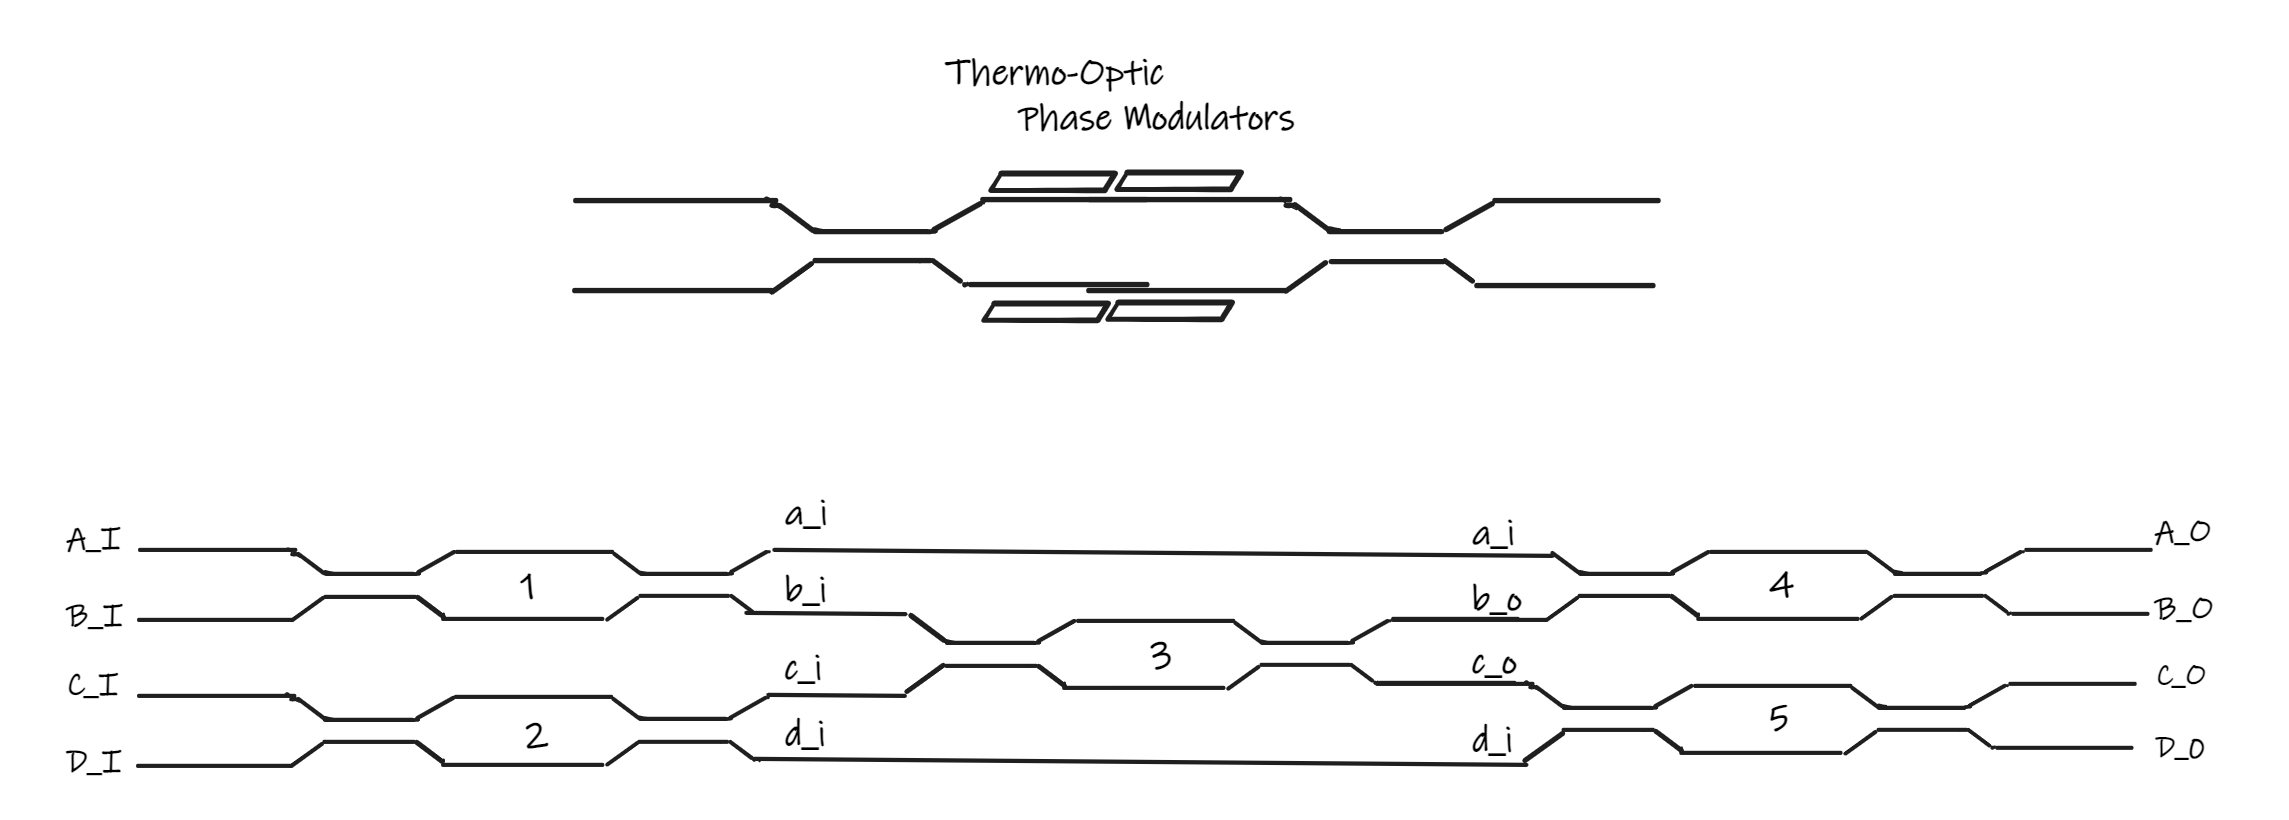

## Connecting MZI's to form a 5 TBU 4X4 MZI Mesh

In [ ]:
def mzi_mesh(inputs, phases = [90, 0, 90, 0, 90, 0, 90, 0, 90, 0]):
  """
  Connects the 4X4 MZI mesh and returns output magnitudes
  and output phases at the 4 output ports.

  Args:
        inputs (list): List of inputs to the mesh, expecting 4 values in the list.
        phases (list): (OPTIONAL), List of phase modulator's phase for 5 MZI's.
                        Defaults to a 90 degree phase difference for each MZI unit. 
  """
  if len(inputs) != 4:
        raise ValueError(f"List with length 4 was expected for list 'inputs', got length of {len(inputs)}. \n 4 inputs to the two MZI's.")
  if len(phases) != 10:
        raise ValueError(f"List with length 10 was expected for list 'phases', got length of {len(phases)}.")

  first = mzi(inputs[0], inputs[1], phases[0], phases[1])
  second = mzi(inputs[2], inputs[3], phases[2], phases[3])

  third = mzi(first[1], second[0], phases[4], phases[5])
  fourth = mzi(first[0], third[0], phases[6], phases[7])
  fifth = mzi(third[1], second[1], phases[8], phases[9])
  return [[fourth[0], fourth[1], fifth[0], fifth[1]], phases]

### Find all combinations of path available

In [ ]:
def findoutputs(inputAmplitudes):
  """
  Returns a list of the all possible outputs and the corresponding phase modulators' phases given the input.

  Args:
        inputAmplitudes (list): List of inputs to the mesh, expecting 4 values in the list.
  """
  majlist = []
  phaselist = [0, 90, 180, 270]
  # Looping through all possible values of phase differences for the 5 phase modulators.
  # Calling mzi_mesh for all of the above combinations and saving the outputs in a list.
  for i in phaselist:
    for j in phaselist:
      for k in phaselist:
        for l in phaselist:
          for m in phaselist:
            majlist.append(mzi_mesh(inputAmplitudes, [i, 0, j, 0, k, 0, l, 0, m, 0]))
  # Finding the absolute value of the complex list (output list has complex values) 
  # and rounding off to 4 decimal places.
  for minilist in majlist:
    for i in range (4):
      minilist[0] [i] = np.around(abs(minilist[0] [i]), 4)
  return majlist

### Given inputs and outputs, returns all paths.

In [ ]:
def findpaths(inputAmplitudes, outputAmplitudes):
  """
  Returns a list of the phase modulators' phases given the input and the expected output.

  Args:
        inputAmplitudes (list): List of inputs to the mesh, expecting 4 values in the list.
        outputAmplitudes (list): List of expected outputs of the mesh, expecting 4 values in the list. 
  """
  pathlist = []
  # Out of all the outputs returned by the function "findoutputs" saving the ones that match the expected
  # outputs to the "pathlist" list with the corresponding phases of the phase modulators
  outputs = findoutputs(inputAmplitudes)
  for i in range(len(outputs)):
    if outputs[i][0] == outputAmplitudes:
      pathlist.append(outputs[i])
  pathlist
  return pathlist

In [ ]:
def findpath(inputAmplitudes, outputAmplitudes):
  """
  Returns a list of the phase modulators' phases given the input and the expected output.

  Args:
        inputAmplitudes (list): List of inputs to the mesh, expecting 4 values in the list.
        outputAmplitudes (list): List of expected outputs of the mesh, expecting 4 values in the list. 
  """
  majlist = []
  phaselist = [0, 90, 180, 270]
  # Looping through all possible values of phase differences for the 5 phase modulators.
  # Calling mzi_mesh for all of the above combinations and saving the outputs in a list.
  for i in phaselist:
    for j in phaselist:
      for k in phaselist:
        for l in phaselist:
          for m in phaselist:
            majlist.append(mzi_mesh(inputAmplitudes, [i, 0, j, 0, k, 0, l, 0, m, 0]))
  # Finding the absolute value of the complex list (output list has complex values) 
  # and rounding off to 4 decimal places.
  for minilist in majlist:
    for i in range (4):
      minilist[0] [i] = np.around(abs(minilist[0] [i]), 4)

  pathlist = []

  for i in range(len(majlist)):
    if majlist[i][0] == outputAmplitudes:
      pathlist.append(majlist[i])
  return pathlist

### Defines a naive cost function (based on number of Phase Modulators and their phases)

In [ ]:
def cost(inputAmplitudes, outputAmplitudes):
  cost = 0
  costs = []
  path = findpaths(inputAmplitudes, outputAmplitudes)
  for i in range (len(path)):
    for j in range(10):
      if (path[i][1][j] == 270):
        cost += 90
      else: cost += path[i][1][j]
    costs.append(cost)
    cost = 0
  mini = min(costs, default = "No path")
  npcost = np.array(costs)
  corr_phases = []
  if type(mini) != str:
    min_index = list(np.where(npcost == mini)[0])
  else: min_index = " "

  if type(min_index) != str:
    for i in range(len(min_index)):
      corr = list(path[min_index[i]][1])
      corr_phases.append(corr)
  else: corr_phases = " "

  print(f"Inputs:{inputAmplitudes}, Outputs:{outputAmplitudes}")
  print("The minimum cost for the given input and output is:", mini)
  print("The sequence(s) of phases:", corr_phases)
  print("--------------------------------------------------------")
  return [inputAmplitudes, outputAmplitudes, mini, corr_phases]

In [ ]:
cost([0, 0, 0, 1], [0, 0, 0, 1])

Inputs:[0, 0, 0, 1], Outputs:[0, 0, 0, 1]
The minimum cost for the given input and output is: 180
The sequence(s) of phases: [[0, 0, 0, 0, 180, 0, 0, 0, 0, 0]]
--------------------------------------------------------


[[0, 0, 0, 1], [0, 0, 0, 1], 180, [[0, 0, 0, 0, 180, 0, 0, 0, 0, 0]]]

Returns all possible inputs, outputs with their possible paths

In [ ]:
def goliath():
  import itertools
  perm = []
  for i in range(4):
    perm.append(list(list(itertools.product([0, 1], repeat = 4))[i]))
  for i in perm:
    for j in perm:
      cost(i, j)
  return cost(i, j)

In [ ]:
goliath()

Prints cost for all combinations of single input and output

In [ ]:
def print_cost_one():
  one = [[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]]
  for i in one:
    for j in one:
      print(cost(i, j))
      # print(f"Inputs:{cost(i, j)[0]}, Outputs:{cost(i, j)[1]}")
      # print("The minimum cost for the given input and output is:", cost(i, j)[2])
      # print("The sequence(s) of phases:", cost(i, j)[4])
      print("--------------------------------------------------------------------")
print_cost_one()